In [8]:
# Import required packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm

import pandas as pd
import csv

filename='data/! IVgate_4pt_graphene [2022_03_17_SD_sap_CVD_c01(6) _4pt_IVgate_graphene_dev5_-100..+100mV_; 4_25_2023 6_04_23 PM].csv'

# make dictionary
dict = {}
with open(filename, newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] in ['TestParameter', 'MetaData', 'AnalysisSetup']:
            key = row[1].strip()
            value = [x.strip() for x in row[2:]]
            dict.setdefault(key, []).extend(value)

#for key, value in data.items():
#    print(key + ': ' + str(value))

# use selected key-value entries
RecordTime = dict['TestRecord.RecordTime'][0]
DeviceID = dict['TestRecord.TestTarget'][0]
Remarks = dict['TestRecord.Remarks'][0]
print(RecordTime, DeviceID, Remarks)

# fill dataframe with measurement values
data = []; start = False

with open(filename) as f:
    for line in f:
        if start:
            row = line.strip().split(', ')[1:]
            data.append([float(val) for val in row])
        if line.startswith('DataName'):
            columns = line.strip().split(', ')[1:]
            start = True

df = pd.DataFrame(data, columns=columns)

# print the dataframe with values in scientific notation
pd.options.display.float_format = '{:.2E}'.format
#print(df.to_string(index=False))


04/25/2023 18:04:23 2022_03_17_SD_sap_CVD_c01 4pt_IVgate_graphene_dev5_-100..+100mV


In [9]:
# identify forward and reverse sweeps
double = True if dict['Measurement.Primary.Locus'][0] == 'Double' else False
datapoints = (float(dict['Measurement.Primary.Stop'][0])-float(dict['Measurement.Primary.Start'][0]))/float(dict['Measurement.Primary.Step'][0])
fw_start = 0
fw_stop = int(datapoints)
re_start = int(datapoints+1)
re_stop = int(2*datapoints+2)
#print(fstart,fend,rstart,rend)
#sec_start = dict['Measurement.Secondary.Start']
#sec_count = dict['Measurement.Secondary.Count']
#sec_step = dict['Measurement.Secondary.Step']
#VS = set([i for i ])
#VS=set([i for i in df["VS"] if sum([1 for a in df["VS"] if a == i]) > 1])
#print(VS)
#print(meta_dict['Measurement.Secondary.Start'],meta_dict['Measurement.Secondary.Count'],meta_dict['Measurement.Secondary.Step'])

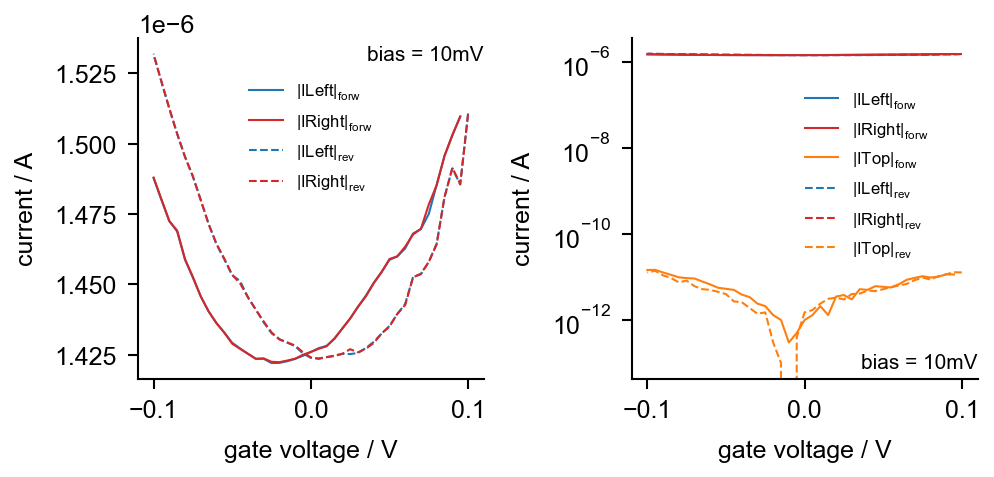

04/25/2023 18:04:23 2022_03_17_SD_sap_CVD_c01 4pt_IVgate_graphene_dev5_-100..+100mV


In [10]:
# use plot parameters from module plotting_params.py
from plotting_params import set_rcParams
set_rcParams()

# use tab10 colormap https://matplotlib.org/stable/tutorials/colors/colormaps.html
from pylab import cm
colors = cm.get_cmap('tab10')

# define figure panel and size
fig = plt.figure(figsize=(2*8.5/2.54,8.5/2.54),dpi=150)
ax1=fig.add_subplot(121)
ax2=fig.add_subplot(122)
# no top and right axis
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# first subplot
ax1.set_yscale('linear')
ax1.plot(df["Vtop"][fw_start:fw_stop], df["Iabs_left"][fw_start:fw_stop], '-', linewidth=1, color=colors(0), label='|ILeft|$_{forw}$')
ax1.plot(df["Vtop"][fw_start:fw_stop], df["Iabs_right"][fw_start:fw_stop], '-', linewidth=1, color=colors(3), label='|IRight|$_{forw}$')
if double:
    ax1.plot(df["Vtop"][re_start:re_stop], df["Iabs_left"][re_start:re_stop], '--', linewidth=1, color=colors(0), label='|ILeft|$_{rev}$')
    ax1.plot(df["Vtop"][re_start:re_stop], df["Iabs_right"][re_start:re_stop], '--', linewidth=1, color=colors(3), label='|IRight|$_{rev}$')

ax1.set_ylabel('current / A', labelpad=8)
ax1.set_xlabel('gate voltage / V', labelpad=8)
#ax1.yaxis.set_major_formatter('{:.2f}'.format)

# second subplot
ax2.set_yscale('log')
ax2.plot(df["Vtop"][fw_start:fw_stop], df["Iabs_left"][fw_start:fw_stop], '-', linewidth=1, color=colors(0), label='|ILeft|$_{forw}$')
ax2.plot(df["Vtop"][fw_start:fw_stop], df["Iabs_right"][fw_start:fw_stop], '-', linewidth=1, color=colors(3), label='|IRight|$_{forw}$')
ax2.plot(df["Vtop"][fw_start:fw_stop], df["Iabs_top"][fw_start:fw_stop], '-', linewidth=1, color=colors(1), label='|ITop|$_{forw}$')
if double:
    ax2.plot(df["Vtop"][re_start:re_stop], df["Iabs_left"][re_start:re_stop], '--', linewidth=1, color=colors(0), label='|ILeft|$_{rev}$')
    ax2.plot(df["Vtop"][re_start:re_stop], df["Iabs_right"][re_start:re_stop], '--', linewidth=1, color=colors(3), label='|IRight|$_{rev}$')
    ax2.plot(df["Vtop"][re_start:re_stop], df["Iabs_top"][re_start:re_stop], '--', linewidth=1, color=colors(1), label='|ITop|$_{rev}$')

ax2.set_ylabel('current / A', labelpad=8)
ax2.set_xlabel('gate voltage / V', labelpad=8)

# Add legend to plot
ax1.legend(bbox_to_anchor=(0.5, 0.5), loc=0, frameon=False, fontsize=8)
ax2.legend(bbox_to_anchor=(0.9, 0.6), loc=0, frameon=False, fontsize=8)

# add a text box to the first subplot
ax1.text(1, 0.98, 'bias = 10mV',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax1.transAxes,
         fontsize = 10)

# add a text box to the second subplot
ax2.text(1, 0.02, 'bias = 10mV',
         horizontalalignment='right',
         verticalalignment='bottom',
         transform=ax2.transAxes,
         fontsize = 10)


# prevent overlap of figures
plt.tight_layout()

# save hires figure with metadata
metadata = {'DeviceID': dict['TestRecord.TestTarget'][0],
            'Remarks': dict['TestRecord.Remarks'][0],
            'RecordTime': dict['TestRecord.RecordTime'][0]}
plt.savefig('plots/'+DeviceID+'.png', metadata=metadata, dpi=300, transparent=False, bbox_inches='tight')
#plt.savefig('plots/Final_Plot.pdf', dpi=300, transparent=False, bbox_inches='tight')

# show figure
plt.show()

print(RecordTime, DeviceID, Remarks)